In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
auto_base = automap_base()
# reflect the tables
auto_base.prepare(engine, reflect = True)


In [7]:
# View all of the classes that automap found
auto_base.classes.keys()

#View all of the classes that automap found
for table_name in auto_base.classes.keys():
    print(f"\nClass name: {table_name}")
    table_class = getattr(auto_base.classes, table_name)
    print(f"Columns:")
    for column in table_class.__table__.columns:
        print(column.name)


Class name: measurement
Columns:
id
station
date
prcp
tobs

Class name: station
Columns:
id
station
name
latitude
longitude
elevation


In [8]:
# Save references to each table
analysis = auto_base.classes.measurement
station = auto_base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(analysis.date).order_by(analysis.date.desc()).first()
# Convert the string date to a datetime object
date_obj = dt.datetime.strptime(recent_date[0], '%Y-%m-%d').date()
# Convert the datetime object back to a string in the desired format
formatted_date = date_obj.strftime('%Y-%m-%d')
# Print the formatted date
print(formatted_date)

2017-08-23


The most recent data collected is for the 2017-08-23
2016-08-23


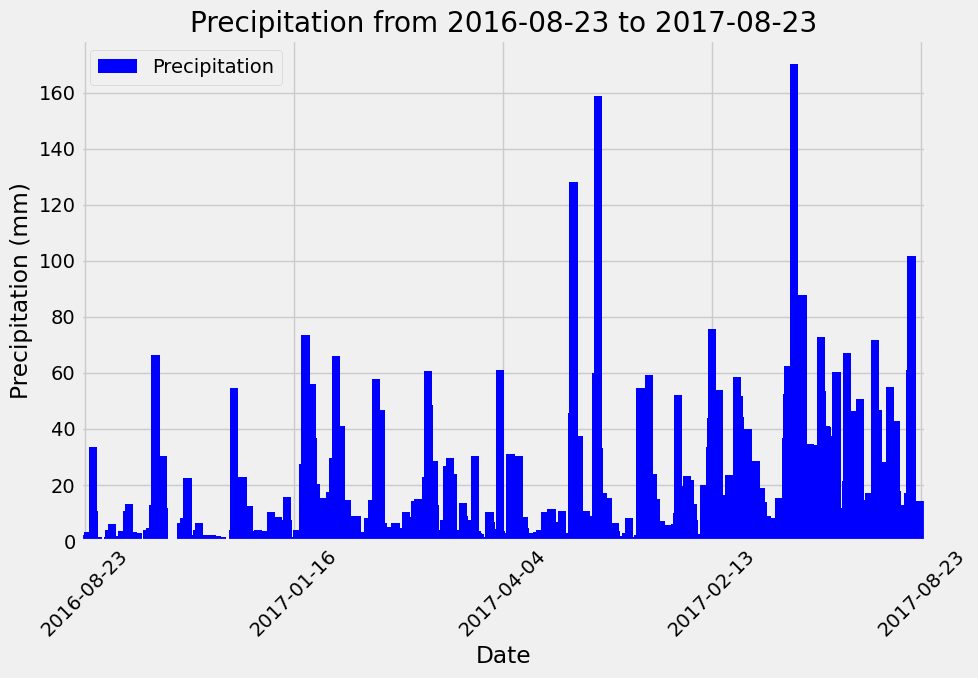

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(f"The most recent data collected is for the {formatted_date}")

# Calculate the date one year from the last date in data set.
twelve_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(twelve_months)

# Perform a query to retrieve the data and precipitation scores
Precipitation_data = session.query(analysis.date, analysis.prcp).all()
# #Print Check
# print(Precipitation_data[0])

# Save the query results as a Pandas DataFrame. Explicitly set the column names
Precipitation_dataset = session.query(analysis.date, analysis.prcp).filter(analysis.date >= "2016-08-23").filter(analysis.date <="2017-08-23").all()
Precipitation_df= pd.DataFrame(Precipitation_dataset, columns=['date', 'prcp']).set_index('date').dropna()
Precipitation_df

# Use Pandas Plotting with Matplotlib to plot the data

ax = Precipitation_df.plot(kind='bar', figsize=(10,7), rot=45, width=20, color='blue',linewidth=1)
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation (mm)")
ax.set_title(f"Precipitation from {twelve_months} to {formatted_date}")

# Set x-tick labels to show only 5 values
n = 5
ticks = ax.get_xticks()
tick_labels = [Precipitation_df.index[int(i)] for i in np.linspace(0, len(Precipitation_df.index) - 1, n)]
ax.set_xticks(np.linspace(ticks[0], ticks[-1], n))
ax.set_xticklabels(tick_labels)

# Change the legend name to "Precipitation"
ax.legend(["Precipitation"])

#Show plot
plt.tight_layout()
plt.show()


In [68]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precipitation_df.describe()

,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations = session.query(station.id).count()
print(number_of_stations)

9


In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(analysis.station, func.count(analysis.id)).group_by(analysis.station).order_by(func.count(analysis.id).desc()).all()
active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_stats = session.query(analysis.station).filter(analysis.station == "USC00519281")
session.query(func.min(analysis.tobs),func.max(analysis.tobs),func.avg(analysis.tobs)).filter(analysis.station == active_station_stats).all()

/var/folders/c6/f4lv068572x0t6lvnvn2yjyc0000gn/T/ipykernel_1046/858995092.py:3: SAWarning: implicitly coercing SELECT object to scalar subquery; please use the .scalar_subquery() method to produce a scalar subquery.
  session.query(func.min(analysis.tobs),func.max(analysis.tobs),func.avg(analysis.tobs)).filter(analysis.station == active_station_stats).all()


[(12.2, 29.4, 22.03582251082252)]

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_temp= session.query(analysis.date, analysis.tobs).filter(analysis.station == active_station_stats).filter(analysis.date >= "2016-08-23").filter(analysis.date <="2017-08-23").all()
active_station_temp

/var/folders/c6/f4lv068572x0t6lvnvn2yjyc0000gn/T/ipykernel_1046/2009148750.py:3: SAWarning: implicitly coercing SELECT object to scalar subquery; please use the .scalar_subquery() method to produce a scalar subquery.
  active_station_temp= session.query(analysis.date, analysis.tobs).filter(analysis.station == active_station_stats).filter(analysis.date >= "2016-08-23").filter(analysis.date <="2017-08-23").all()


[('2016-08-23', 25.0),
 ('2016-08-24', 25.0),
 ('2016-08-25', 26.7),
 ('2016-08-26', 26.7),
 ('2016-08-27', 23.9),
 ('2016-08-28', 22.8),
 ('2016-08-29', 25.6),
 ('2016-08-30', 25.0),
 ('2016-08-31', 25.6),
 ('2016-09-01', 26.7),
 ('2016-09-02', 26.7),
 ('2016-09-03', 25.6),
 ('2016-09-04', 25.6),
 ('2016-09-05', 25.6),
 ('2016-09-06', 22.8),
 ('2016-09-07', 23.3),
 ('2016-09-08', 26.7),
 ('2016-09-09', 26.1),
 ('2016-09-10', 25.0),
 ('2016-09-11', 26.7),
 ('2016-09-12', 24.4),
 ('2016-09-13', 26.1),
 ('2016-09-14', 23.9),
 ('2016-09-15', 26.1),
 ('2016-09-16', 25.6),
 ('2016-09-17', 26.1),
 ('2016-09-18', 25.6),
 ('2016-09-19', 25.6),
 ('2016-09-20', 24.4),
 ('2016-09-21', 23.3),
 ('2016-09-22', 25.0),
 ('2016-09-23', 25.6),
 ('2016-09-24', 26.1),
 ('2016-09-25', 26.1),
 ('2016-09-26', 25.0),
 ('2016-09-27', 26.7),
 ('2016-09-28', 25.6),
 ('2016-09-29', 25.6),
 ('2016-09-30', 25.6),
 ('2016-10-01', 25.0),
 ('2016-10-02', 26.1),
 ('2016-10-03', 26.1),
 ('2016-10-04', 26.1),
 ('2016-10-

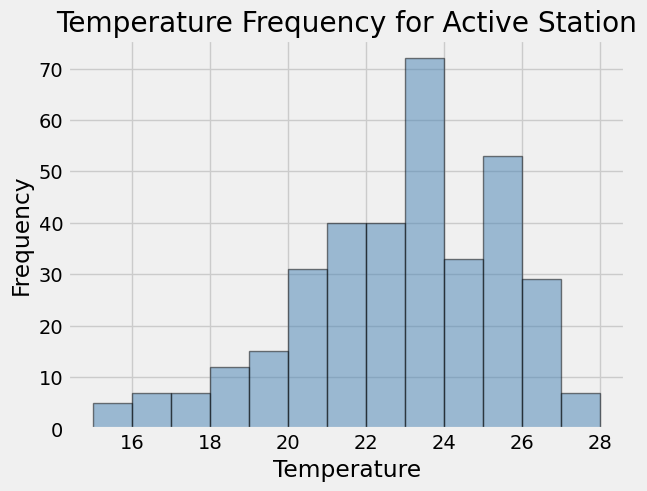

In [39]:
# Extract the temperatures from the query results and store them in a list
temperatures = [temp[1] for temp in active_station_temp]

# Define the bin range and bin width for the histogram
bin_range = np.arange(15, 29, 1)
bin_width = 1

# Create the histogram plot
plt.hist(temperatures, bins=bin_range, width=bin_width, color='steelblue', alpha=0.5, edgecolor='black', linewidth=1)

# Set the plot title and labels for x and y axes
plt.title("Temperature Frequency for Active Station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Show the plot
plt.show()

# Close Session

In [40]:
# Close Session
session.close()